In [14]:
import numpy as np 
import pandas as pd 

data_path = "../data/users.csv"

users = pd.read_csv(data_path)


In [15]:
users.shape

(1340, 5)

In [16]:
users.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [17]:
users.duplicated().sum()

0

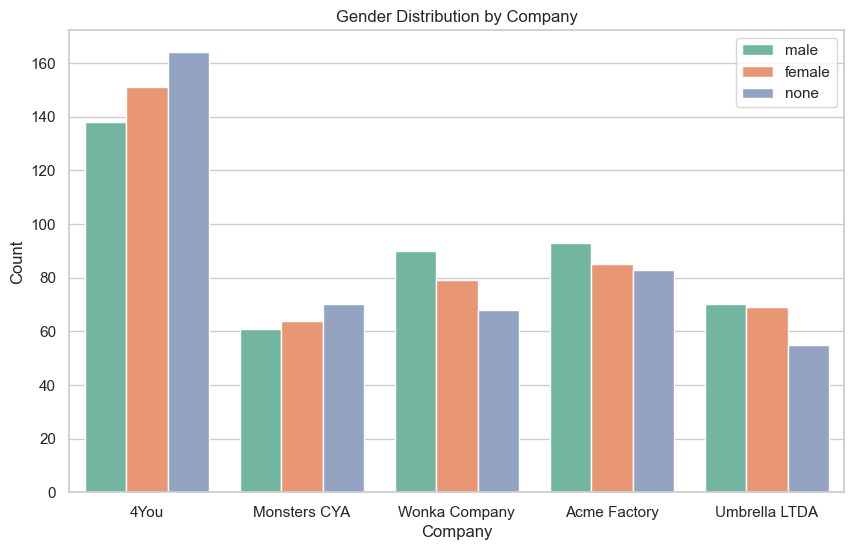

In [18]:
# show the number of each gender class for each company in the users dataframe using seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(data=users, x='company', hue='gender' , palette='Set2')
plt.title('Gender Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.legend()
plt.show()              





There are significant number of users mapped to none class gender . There numbers are significant in each of the companies in the dataset.For 2 companies , we can see that there number are even higher than the number of other two gender users in the company.

Notably , this is not a common user ratio . It implies that the users have deliberately not disclosed there genders.So this class is for users who have not disclosed there genders

In [19]:
# Proportions of each gender in the users dataframe
users['gender'].value_counts(normalize = True)

gender
male      0.337313
female    0.334328
none      0.328358
Name: proportion, dtype: float64

In [20]:
# Mean age of each gender class 
users.groupby('gender')['age'].mean()

gender
female    43.180804
male      42.703540
none      42.336364
Name: age, dtype: float64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


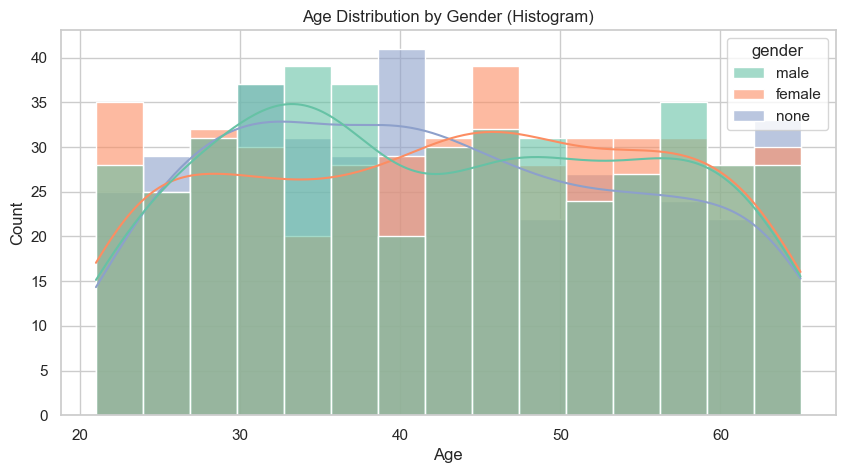

In [22]:
# create the distribution of age for each gender class

plt.figure(figsize=(10, 5))
sns.histplot(data=users, x="age", hue="gender", kde=True, bins=15, palette="Set2", alpha=0.6)
plt.title("Age Distribution by Gender (Histogram)")
plt.xlabel("Age")
plt.ylabel("Count")
# plt.legend(title="Gender")
plt.show()



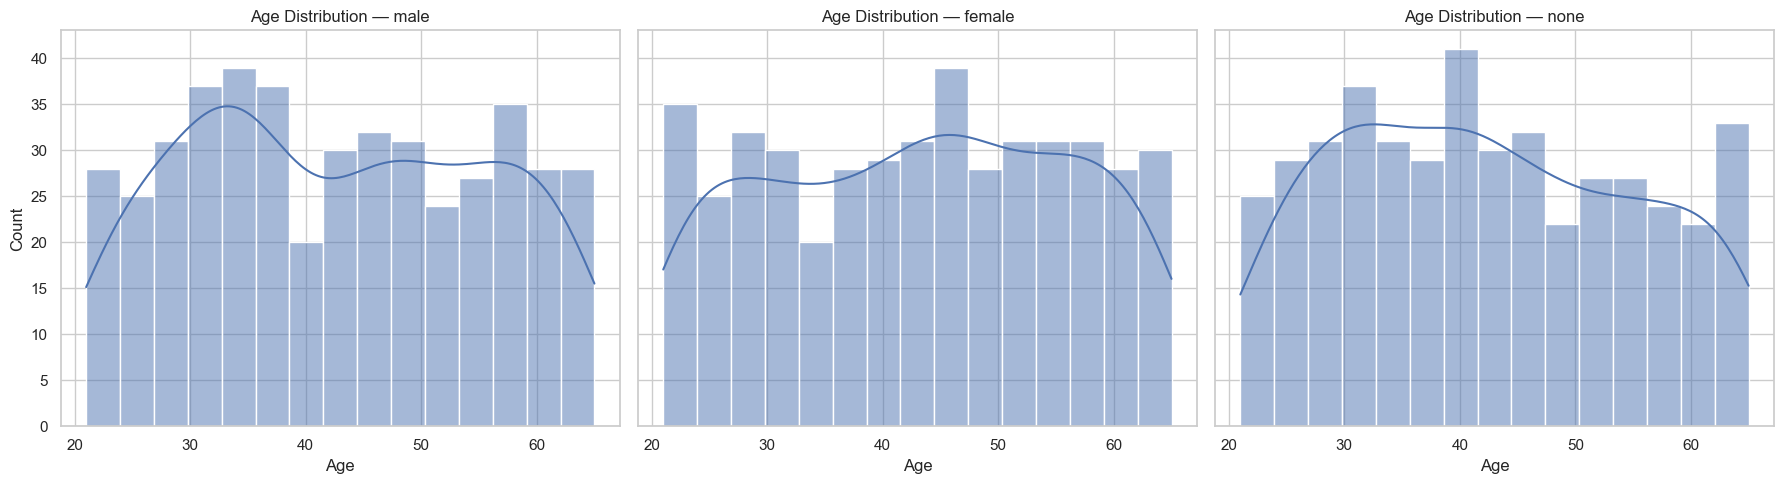

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

genders = users["gender"].unique()

fig, axes = plt.subplots(1, len(genders), figsize=(18, 5), sharey=True)

for ax, g in zip(axes, genders):
    sns.histplot(
        data=users[users["gender"] == g],
        x="age",
        kde=True,
        bins=15,
        ax=ax
    )
    ax.set_title(f"Age Distribution — {g}")
    ax.set_xlabel("Age")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


In [24]:
# Median age of each gender class 

users.groupby('gender')['age'].median()

gender
female    44.0
male      42.5
none      41.0
Name: age, dtype: float64

In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [26]:
# Just Knowing the company , name and age of the user is not enough to classify gender

# loading the other two datasets 

hotels_data_path = "../data/hotels.csv"
flights_data_path = "../data/flights.csv"
hotels = pd.read_csv(hotels_data_path)
flights = pd.read_csv(flights_data_path)

In [27]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [28]:
hotels.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [29]:
# Check for missing values in hotels 
hotels.isnull().sum()

travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64

In [30]:
# Number of unique users in hotels dataset
print(hotels['userCode'].nunique())
# Number of unique users in the users dataset 
print(users['code'].nunique())



1310
1340


There are 30 such users in the users dataset who do not have any corresponding entry in the hotels dataset. It means these users have not booked any hotels.

In [31]:
print(hotels.travelCode.nunique())
print(flights.travelCode.nunique())

40552
135944


In the flights dataset , there are 135944 unique travel trips while in the hotels dataset there are only 40552 unique travel trips. This shows that majority of the travel trips planned by the users have not involved hotel bookings.Only 40553 travel trips involved hotel bookings.

There can multiple reasons pertaining to this observation such as :
1. Users might have planned to stay with friends or relatives during the trip
2. Users might have planned day trips where hotel bookings are not required. They will return the same day.

In [32]:
hotels.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [33]:
# Number of unique hotels in the hotels dataset
print(hotels['name'].nunique())
# Names of uniques hotels in the hotels dataset
print(hotels['name'].unique())

9
['Hotel A' 'Hotel K' 'Hotel BD' 'Hotel Z' 'Hotel AU' 'Hotel AF' 'Hotel BW'
 'Hotel CB' 'Hotel BP']


In [34]:
# Number of hotel locations (place) in the hotels dataset 
print(hotels['place'].nunique())
print(hotels['place'].unique())

9
['Florianopolis (SC)' 'Salvador (BH)' 'Natal (RN)' 'Aracaju (SE)'
 'Recife (PE)' 'Sao Paulo (SP)' 'Campo Grande (MS)' 'Rio de Janeiro (RJ)'
 'Brasilia (DF)']


In [35]:
# Range of days feature in the hotels dataset 
print(hotels['days'].min() ,";" ,  hotels['days'].max())

1 ; 4


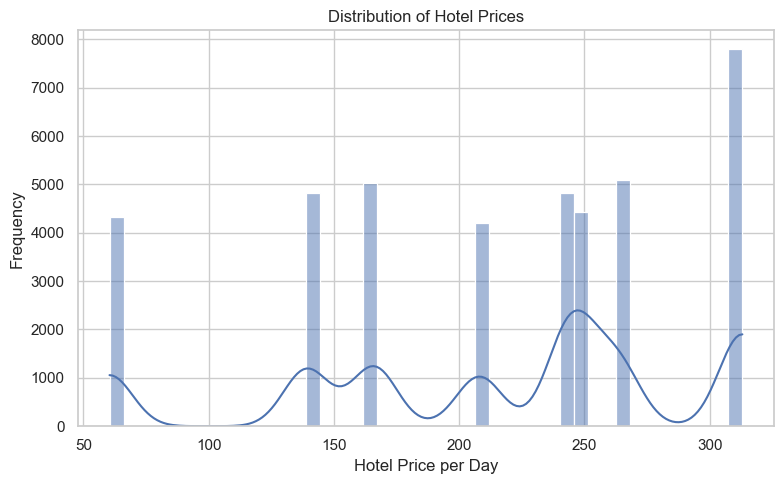

In [36]:
# plot the distribution of hotel prices (price) in the hotels dataset 
plt.figure(figsize=(8, 5))
sns.histplot(hotels["price"], kde=True)
plt.title("Distribution of Hotel Prices")
plt.xlabel("Hotel Price per Day")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [37]:
hotels['price'].unique()

array([313.02, 263.41, 242.88, 208.04, 312.83, 139.1 ,  60.39, 165.99,
       247.62])

There are only 9 unique values for the price per day for the hotels.

In [38]:
# Convert date column to datetime format
hotels['date'] = pd.to_datetime(hotels['date'])
# Find range of hotel bootking dates 
min_date = hotels['date'].min()
max_date = hotels['date'].max()
print("Hotel booking dates range from", min_date, "to", max_date)

Hotel booking dates range from 2019-09-26 00:00:00 to 2023-07-13 00:00:00


In [39]:
hotels.columns

Index(['travelCode', 'userCode', 'name', 'place', 'days', 'price', 'total',
       'date'],
      dtype='object')

C:\Users\Ankur Bhatt\AppData\Local\Temp\ipykernel_16156\3515048822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotels, x='name' , palette='Set3')


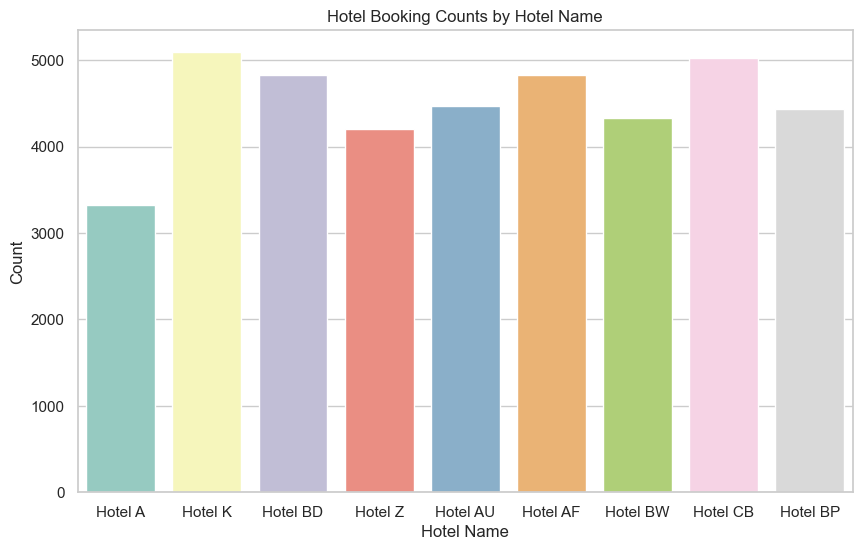

In [40]:
#plot the counts of each hotels 
plt.figure(figsize=(10,6))
sns.countplot(data=hotels, x='name' , palette='Set3')
plt.title('Hotel Booking Counts by Hotel Name')
plt.xlabel('Hotel Name')
plt.ylabel('Count')
plt.show()

C:\Users\Ankur Bhatt\AppData\Local\Temp\ipykernel_16156\1410579184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotels, x='place' , palette='Set3')


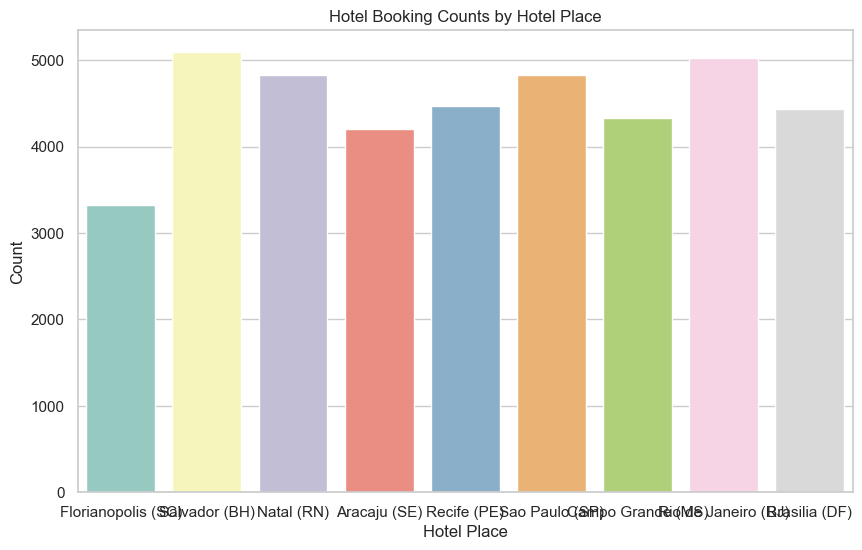

In [41]:
# count of each hotel place
plt.figure(figsize=(10,6))
sns.countplot(data=hotels, x='place' , palette='Set3')
plt.title('Hotel Booking Counts by Hotel Place')
plt.xlabel('Hotel Place')
plt.ylabel('Count')
plt.show()

In [42]:
hotels.columns

Index(['travelCode', 'userCode', 'name', 'place', 'days', 'price', 'total',
       'date'],
      dtype='object')

In [43]:
# Get all the unique hotel names for each place
hotels.groupby('place')['name'].unique()


place
Aracaju (SE)            [Hotel Z]
Brasilia (DF)          [Hotel BP]
Campo Grande (MS)      [Hotel BW]
Florianopolis (SC)      [Hotel A]
Natal (RN)             [Hotel BD]
Recife (PE)            [Hotel AU]
Rio de Janeiro (RJ)    [Hotel CB]
Salvador (BH)           [Hotel K]
Sao Paulo (SP)         [Hotel AF]
Name: name, dtype: object

In [44]:
# price of each unique hotel in descending order

hotels.groupby('name')['price'].mean().sort_values(ascending=False)

name
Hotel A     313.02
Hotel AU    312.83
Hotel K     263.41
Hotel BP    247.62
Hotel BD    242.88
Hotel Z     208.04
Hotel CB    165.99
Hotel AF    139.10
Hotel BW     60.39
Name: price, dtype: float64

C:\Users\Ankur Bhatt\AppData\Local\Temp\ipykernel_16156\3208078546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hotels, x='name', y='price', palette='Set3')


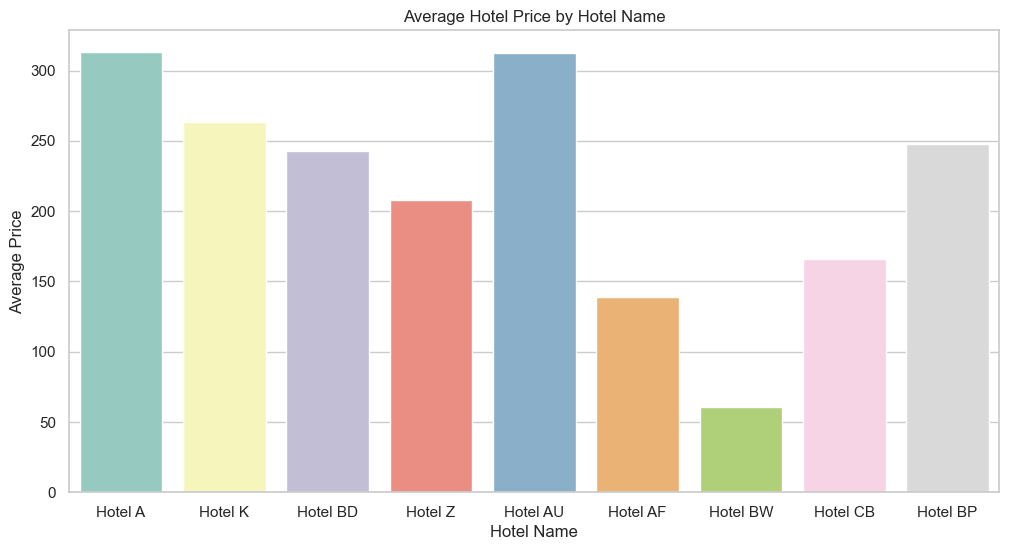

In [45]:
# plot the price of each unique hotels
plt.figure(figsize=(12,6))
sns.barplot(data=hotels, x='name', y='price', palette='Set3')
plt.title('Average Hotel Price by Hotel Name')
plt.xlabel('Hotel Name')
plt.ylabel('Average Price')
plt.show()

In [46]:
hotels.columns

Index(['travelCode', 'userCode', 'name', 'place', 'days', 'price', 'total',
       'date'],
      dtype='object')

In [47]:
# Convert the flights date column to datetime format
flights['date'] = pd.to_datetime(flights['date'])
# Find the range of flight booking dates
min_date_flights = flights['date'].min()
max_date_flights = flights['date'].max()
print("Flight booking dates range from", min_date_flights, "to", max_date_flights)


Flight booking dates range from 2019-09-26 00:00:00 to 2023-07-24 00:00:00


The range of flight booking dates and range of hotel booking dates are nearly similar which indicates that the datasets are consistent in terms of time period covered.

In [48]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   travelCode  271888 non-null  int64         
 1   userCode    271888 non-null  int64         
 2   from        271888 non-null  object        
 3   to          271888 non-null  object        
 4   flightType  271888 non-null  object        
 5   price       271888 non-null  float64       
 6   time        271888 non-null  float64       
 7   distance    271888 non-null  float64       
 8   agency      271888 non-null  object        
 9   date        271888 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 20.7+ MB


In [49]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [50]:
# Checking the uniqueness of users code feature 

assert users['code'].is_unique, "User codes are not unique!"

Each record of users dataset corresponds to a unique user. There are no duplicate user_ids in the users dataset.

In [51]:
# Checking whether there are userCodes in flights which are not present in users code feature. We expect the absence of such userCodes.

flights["userCode"].isin(users["code"]).mean()


1.0

The above mean of 1.0 indicates that all the unique userCodes in the flights dataset are present in the users dataset, as expected.So there are no orphan userCodes in the flights dataset.

Earlier we had seen that there are 30 users in the users dataset who do not have any corresponding entry in the hotels dataset. It means these users have not booked any hotels.

In [52]:
# Now Checking whether all the users in the users dataset have booked the flights or not 

users["code"].isin(flights['userCode']).mean()

0.996268656716418

There are some users in the users dataset who have not booked any flights.

In [53]:
users[~users["code"].isin(flights['userCode'])]

# These are those users who have not booked any flights.

,code,company,name,gender,age
385,385,4You,Jeffery Gill,male,53
670,670,Wonka Company,Patrick Obrien,none,32
863,863,Wonka Company,Ronald Markus,none,63
893,893,Acme Factory,Jessica Godina,none,30
983,983,Acme Factory,Daniel Marin,male,43


In [54]:
no_flight_users = users.loc[~users["code"].isin(flights['userCode']) , 'code']
no_flight_users


385    385
670    670
863    863
893    893
983    983
Name: code, dtype: int64

In [55]:
hotels[hotels['userCode'].isin(no_flight_users)]

# These uses have no booking of hotels as well.

,travelCode,userCode,name,place,days,price,total,date


In [56]:
# We first merge the Users and Flights datasets using a left join on users.code and flights.userCode, retaining user-level records even when no flights exist. After this, the resulting dataset is merged with the Hotels dataset using a left join on travelCode to associate hotel bookings with each trip when available. Duplicate identifier columns such as users.code are dropped after the merge since userCode uniquely represents the user across datasets.


df = users.merge(flights, left_on="code", right_on="userCode", how="left")

df = df.merge(hotels, on="travelCode", how="left")

df = df.drop(columns=["code"])  # optional cleanup


In [57]:
df.shape

(271893, 21)

In [58]:
df.columns

Index(['company', 'name_x', 'gender', 'age', 'travelCode', 'userCode_x',
       'from', 'to', 'flightType', 'price_x', 'time', 'distance', 'agency',
       'date_x', 'userCode_y', 'name_y', 'place', 'days', 'price_y', 'total',
       'date_y'],
      dtype='object')

In [59]:
# price_x -> flight price
# price_y -> hotel price
# userCode_x and userCode_y are the same columns : userCode 
# date_x -> flight date
# date_y -> hotel booking date
# name_x -> user name
# name_y -> hotel name
# we have to rename these columns for better understanding and duplicate columns removal
df = df.rename(columns={
    "price_x": "flight_price",
    "price_y": "hotel_price",
    "date_x": "flight_date",
    "date_y": "hotel_booking_date",
    "name_x": "user_name",
    "name_y": "hotel_name"
})
df = df.drop(columns=["userCode_y"])
# rename userCode_x to userCode
df = df.rename(columns={"userCode_x": "userCode"})

In [60]:
# convert the travelCode to int type from float , userCode to int type from float and days to int type from float
df["travelCode"] = df["travelCode"].astype("Int64")
df["userCode"] = df["userCode"].astype("Int64")
df["days"] = df["days"].astype("Int64")

In [61]:
df.head()

,company,user_name,gender,age,travelCode,userCode,from,to,flightType,flight_price,time,distance,agency,flight_date,hotel_name,place,days,hotel_price,total,hotel_booking_date
0,4You,Roy Braun,male,21,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26
1,4You,Roy Braun,male,21,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26
2,4You,Roy Braun,male,21,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,NaN,NaN,<NA>,NaN,NaN,NaT
3,4You,Roy Braun,male,21,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,NaN,NaN,<NA>,NaN,NaN,NaT
4,4You,Roy Braun,male,21,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,Hotel K,Salvador (BH),2,263.41,526.82,2019-10-10


In [62]:
df['flight_date'] = pd.to_datetime(df['flight_date'])
df['hotel_booking_date'] = pd.to_datetime(df['hotel_booking_date'])

df['flight_year'] = df['flight_date'].dt.year
df['flight_Day'] = df['flight_date'].dt.day
df['flight_is_weekend'] = df['flight_date'].dt.weekday >= 5 
df['flight_month'] = df['flight_date'].dt.month


df['hotel_year'] = df['hotel_booking_date'].dt.year
df['hotel_Day'] = df['hotel_booking_date'].dt.day
df['booking_is_weekend'] = df['hotel_booking_date'].dt.weekday >= 5
df['booking_month'] = df['hotel_booking_date'].dt.month


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271893 entries, 0 to 271892
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   company             271893 non-null  object        
 1   user_name           271893 non-null  object        
 2   gender              271893 non-null  object        
 3   age                 271893 non-null  int64         
 4   travelCode          271888 non-null  Int64         
 5   userCode            271888 non-null  Int64         
 6   from                271888 non-null  object        
 7   to                  271888 non-null  object        
 8   flightType          271888 non-null  object        
 9   flight_price        271888 non-null  float64       
 10  time                271888 non-null  float64       
 11  distance            271888 non-null  float64       
 12  agency              271888 non-null  object        
 13  flight_date         271888 no

In [64]:
# pandas.options for getting display of all columns in the dataframe
pd.set_option('display.max_columns', None)

In [65]:
df.head()

,company,user_name,gender,age,travelCode,userCode,from,to,flightType,flight_price,time,distance,agency,flight_date,hotel_name,place,days,hotel_price,total,hotel_booking_date,flight_year,flight_Day,flight_is_weekend,flight_month,hotel_year,hotel_Day,booking_is_weekend,booking_month
0,4You,Roy Braun,male,21,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26,2019.0,26.0,False,9.0,2019.0,26.0,False,9.0
1,4You,Roy Braun,male,21,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26,2019.0,30.0,False,9.0,2019.0,26.0,False,9.0
2,4You,Roy Braun,male,21,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,NaN,NaN,<NA>,NaN,NaN,NaT,2019.0,3.0,False,10.0,NaN,NaN,False,NaN
3,4You,Roy Braun,male,21,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,NaN,NaN,<NA>,NaN,NaN,NaT,2019.0,4.0,False,10.0,NaN,NaN,False,NaN
4,4You,Roy Braun,male,21,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,Hotel K,Salvador (BH),2,263.41,526.82,2019-10-10,2019.0,10.0,False,10.0,2019.0,10.0,False,10.0


In [66]:
df.columns

Index(['company', 'user_name', 'gender', 'age', 'travelCode', 'userCode',
       'from', 'to', 'flightType', 'flight_price', 'time', 'distance',
       'agency', 'flight_date', 'hotel_name', 'place', 'days', 'hotel_price',
       'total', 'hotel_booking_date', 'flight_year', 'flight_Day',
       'flight_is_weekend', 'flight_month', 'hotel_year', 'hotel_Day',
       'booking_is_weekend', 'booking_month'],
      dtype='object')

In [67]:
# saving the final merged dataframe to a csv file
final_data_path = "./gender_data/integrated_df.csv"
df.to_csv(final_data_path, index=False)